# Nama : Farras Nur Haidar Ramadhan
# Email : farrasnurhaidar04@gmail.com
# username Dicoding : farrasnhr

# Library yang digunakan

Menyiapkan beberapa library guna menunjang pengerjaan proyek. Berikut library yang akan digunakan pada proyek ini:

In [1]:
# Library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Library untuk pembagian data
from sklearn.model_selection import train_test_split

# Library untuk algoritma machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Library untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix

# Library untuk unngah berkas
from google.colab import files

# Data Loading

Proses ini dilakukan pengambilan dataset dari Kaggle dari *setup* *username* dan *key* dalam bentuk `json`, kemudian melakukan pengunduhan *resource*, dan data yang telah diunduh dalam bentuk zip akan dilakukan ekstraksi.

## Mengunduh resource

Mengunggah berkas berisi username dan key untuk mendownload resource berupa dataset di Kaggle

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farrasramadhan","key":"6efe077df4ef11eb390e33c88f8a7c00"}'}

Melakukan instalasi Kaggle kemudian mengunduh resource dan ekstraksi resource

In [3]:
!pip install kaggle

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# Mengunduh dataset Fruits 360
!kaggle datasets download -d mingyuouyang/chicago-crime-dataset-2018-to-2021

# Mengekstrak dataset
!unzip chicago-crime-dataset-2018-to-2021.zip -d crime

Dataset URL: https://www.kaggle.com/datasets/mingyuouyang/chicago-crime-dataset-2018-to-2021
License(s): unknown
 90% 49.0M/54.4M [00:00<00:00, 137MB/s]
100% 54.4M/54.4M [00:00<00:00, 123MB/s]
Archive:  chicago-crime-dataset-2018-to-2021.zip
  inflating: crime/Crimes_-_2018.csv  
  inflating: crime/Crimes_-_2019.csv  
  inflating: crime/Crimes_-_2020.csv  
  inflating: crime/Crimes_-_2021.csv  


# Data Understanding

Dataset yang digunakan untuk proyek ini adalah [Chicago Crime Dataset 2018 to 2021](https://www.kaggle.com/datasets/mingyuouyang/chicago-crime-dataset-2018-to-2021?select=Crimes_-_2018.csv) yang diambil dari laman Kaggle. Dataset tersebut memiliki 4 file dengan format csv berukuran 226.34 MB

Melihat jumlah dari masing-masing berkas csv

In [ ]:
df = pd.read_csv("crime/Crimes_-_2018.csv")

In [ ]:
df.shape

(268602, 22)

1. dataset untuk tahum 2018 berisi sebanyak 268602 baris dan 22 kolom.

In [ ]:
df = pd.read_csv("crime/Crimes_-_2019.csv")

In [ ]:
df.shape

(261019, 22)

2. dataset untuk tahum 2019 berisi sebanyak 261019 baris dan 22 kolom.

In [ ]:
df = pd.read_csv("crime/Crimes_-_2020.csv")

In [ ]:
df.shape

(211716, 22)

3. dataset untuk tahum 2020 berisi sebanyak 211716 baris dan 22 kolom.

In [ ]:
df = pd.read_csv("crime/Crimes_-_2021.csv")

In [ ]:
df.shape

(207087, 22)

4. dataset untuk tahum 2021 berisi sebanyak 207087 baris dan 22 kolom.

Membuat folder dan menggabungkan 4 file csv menjadi 1 file csv

In [4]:
import pandas as pd
import os

# Path ke folder tempat file diekstrak
folder_path = 'crime'

# Buat list untuk menyimpan setiap DataFrame
dfs = []

# Loop melalui file CSV di folder dan gabungkan
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        # Membaca setiap file CSV
        df = pd.read_csv(file_path)
        dfs.append(df)

# Menggabungkan semua DataFrame menjadi satu
df = pd.concat(dfs, ignore_index=True)

In [5]:
print(f"Total baris dalam dataset: {df.shape[0]} dan {df.shape[1]} kolom")

Total baris dalam dataset: 948424 dan 22 kolom


Setelah menggabungkan 4 berkas csv menjadi 1 berkas csv, total data menjadi sebanyak 948424 baris dan 22 kolom

## Cek Duplikasi

Melakukan pengecekan pada dataset apakah memiliki data duplikat.

In [ ]:
# Mengecek jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [ ]:
# Menampilkan baris-baris yang duplikat (jika ingin melihat detailnya)
df_duplikasi = df[df.duplicated()]
print("Baris duplikat:\n", df_duplikasi)

Baris duplikat:
 Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]


dari *ouput* diatas tidak terdapat duplikasi data.

## Cek Missing Values

Melakukan pengecekan apakah semua kolom nilainya sama

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948424 entries, 0 to 948423
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    948424 non-null  int64  
 1   Case Number           948424 non-null  object 
 2   Date                  948424 non-null  object 
 3   Block                 948424 non-null  object 
 4   IUCR                  948424 non-null  object 
 5   Primary Type          948424 non-null  object 
 6   Description           948424 non-null  object 
 7   Location Description  944105 non-null  object 
 8   Arrest                948424 non-null  bool   
 9   Domestic              948424 non-null  bool   
 10  Beat                  948424 non-null  int64  
 11  District              948424 non-null  int64  
 12  Ward                  948385 non-null  float64
 13  Community Area        948423 non-null  float64
 14  FBI Code              948424 non-null  object 
 15  

Melihat ada beberapa kolom yang nilainya tidak sama, dilakukan pengecekan missing values

In [ ]:
# Mengecek jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:\n", missing_values)

# Menampilkan total missing values dalam dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values dalam dataset: {total_missing}")

Jumlah missing values di setiap kolom:
 ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     4319
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                       39
Community Area              1
FBI Code                    0
X Coordinate            14385
Y Coordinate            14385
Year                        0
Updated On                  0
Latitude                14385
Longitude               14385
Location                14385
dtype: int64

Total missing values dalam dataset: 76284


Terdapat total 76284 missing values atau yang tidak terisi dari beberapa fitur.

## Cek Outliers

Melihat apakah terdapat data yang dianggap *outliers* dengan metode IQR

In [ ]:
# Memilih kolom numerik saja
numerik_df = df.select_dtypes(include=['number'])

# Menghitung IQR dan mendeteksi outliers untuk setiap kolom numerik
Q1 = numerik_df.quantile(0.25)
Q3 = numerik_df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers di luar rentang (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
outliers = ((numerik_df < (Q1 - 1.5 * IQR)) | (numerik_df > (Q3 + 1.5 * IQR)))

# Menampilkan jumlah outliers per kolom
print("Jumlah outliers per kolom:\n", outliers.sum())

Jumlah outliers per kolom:
 ID                2674
Beat                 0
District             0
Ward                 0
Community Area       0
X Coordinate      4928
Y Coordinate         2
Year                 0
Latitude             2
Longitude         4999
dtype: int64


Output diatas menunjukkan bahwa terdapat outliers pada beberapa fitur.

## EDA

### Deskripsi Variabel

Melakukan visual pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948424 entries, 0 to 948423
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    948424 non-null  int64  
 1   Case Number           948424 non-null  object 
 2   Date                  948424 non-null  object 
 3   Block                 948424 non-null  object 
 4   IUCR                  948424 non-null  object 
 5   Primary Type          948424 non-null  object 
 6   Description           948424 non-null  object 
 7   Location Description  944105 non-null  object 
 8   Arrest                948424 non-null  bool   
 9   Domestic              948424 non-null  bool   
 10  Beat                  948424 non-null  int64  
 11  District              948424 non-null  int64  
 12  Ward                  948385 non-null  float64
 13  Community Area        948423 non-null  float64
 14  FBI Code              948424 non-null  object 
 15  

Dari informasi dataset diatas, dapat diuraikan fitur-fiturnya sebagai berikut:
1. `ID` berisi nomor unik setiap kejadian,
2. `Case Number` berisi informasi nomor kasus kejadian,
3. `Date` berisi tanggal terjadinya kejahatan di Chicago,
4. `Block` berisi alamat atau lokasi tempat kejadian,
5. `IUCR` berisi kode klasifikasi Illinois Uniform Crime Reporting (IUCR) yang mewakili jenis kejahatan,
6. `Primary Type` berisi informasi jenis kejahatan yang terjadi di Chicago,
7. `Description` berisi deskripsi lebih rinci tentang kejahatan dalam kategori utama,
8. `Location Description` berisi informasi terkait tempat kejadian,
9. `Arrest` berisi informasi apakah ada penangkapan pelaku kejadian,
10. `Domestic` berisi tentang apakah kejahatan tersebut berkaitan dengan kekerasan rumah tangga,
11. `Beat` berisi informasi yang menunjukkan wilayah patroli kepolisian tempat kejadian kejahatan itu terjadi,
12. `Distric` berisi tentang distrik kepolisian di mana kejadian dilaporkan,
13. `Ward` berisi dimana wilayah administratif tempat kejadian terjadi,
14. `Community Area` berisi kode wilayah komunitas atau area geografis tempat kejahatan itu terjadi,
15. `FBI Code` berisi kode standar dari FBI yang mengklasifikasikan jenis kejahatan,
16. `X Coordinate` berisi koordinat X untuk menunjukkan lokasi di peta,
17. `Y Coordinate` berisi koordinat Y untuk menunjukkan lokasi di peta,
18. `Year` berisi tahun kejadian terjadi,
19. `Update On` berisi data tersebut diperbaharui,
20. `Latitude` berisi tentang informasi koordinasi lokasi berupa garis lintang,
21. `Longitude` berisi tentang informasi koordinasi lokasi berupa garis bujur,
22. `Location` berisi gabungan fitur `Latitude` dan `Longitude`.

Terdapat 22 fitur pada dataset dengan berbagai variasi tipe data diantaranya: `bool` sebanyak dua fitur, `float64` sebanyak 6 fitur, `int64` sebanyak 4 fitur, dan `object` sebanyak 10 fitur. Dan berikut tampilan 5 baris teratas setiap fitur:

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,3.0,33.0,11,1177560.0,1889548.0,2019,10/20/2019 03:56:02 PM,41.852248,-87.623786,"(41.852248185, -87.623786256)"
1,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,26.0,24.0,06,1160005.0,1905256.0,2019,10/20/2019 04:03:03 PM,41.895732,-87.687784,"(41.895732399, -87.687784384)"
2,11863808,JC476236,10/05/2019 06:30:00 PM,0000X N LOOMIS ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,27.0,28.0,06,1166986.0,1900306.0,2019,10/20/2019 03:56:02 PM,41.882002,-87.662287,"(41.88200224, -87.662286977)"
3,11859727,JC471542,10/13/2019 07:00:00 PM,016XX W ADDISON ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,47.0,6.0,14,1164930.0,1923972.0,2019,10/20/2019 04:03:03 PM,41.946987,-87.669164,"(41.946987144, -87.669163602)"
4,11859656,JC471240,10/13/2019 02:10:00 PM,051XX N BROADWAY,0560,ASSAULT,SIMPLE,GAS STATION,False,False,...,47.0,3.0,08A,1167380.0,1934505.0,2019,10/20/2019 04:03:03 PM,41.975838,-87.659854,"(41.975837637, -87.659853835)"


Pada proyek ini akan berfokus pada klasifikasi area tingkat kejahatan, maka dari itu dilakukan pemilihan fitur agar dapat menyederhanakan model. Dipilihlah beberapa diantaranya `Primary Type`, `Date`, `Location Description`, `Arrest`, `Domestic`, `Beat`, `District` `Latitude`, `Longitude`, dan `Community Area`

In [8]:
# Fitur yang akan digunakan untuk analisis atau modeling
keep = ['Primary Type', 'Date', 'Location Description', 'Arrest', 'Domestic',
                    'Beat', 'District', 'Latitude', 'Longitude', 'Community Area']

# Memilih hanya fitur yang relevan
df = df[keep]

df.head()

,Primary Type,Date,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area
0,DECEPTIVE PRACTICE,09/24/2019 08:00:00 AM,COMMERCIAL / BUSINESS OFFICE,False,False,132,1,41.852248,-87.623786,33.0
1,THEFT,10/13/2019 08:30:00 PM,GROCERY FOOD STORE,False,False,1221,12,41.895732,-87.687784,24.0
2,THEFT,10/05/2019 06:30:00 PM,RESIDENCE,False,False,1224,12,41.882002,-87.662287,28.0
3,CRIMINAL DAMAGE,10/13/2019 07:00:00 PM,STREET,False,False,1922,19,41.946987,-87.669164,6.0
4,ASSAULT,10/13/2019 02:10:00 PM,GAS STATION,False,False,2033,20,41.975838,-87.659854,3.0


### Ekstraksi

Untuk kebutuhan EDA, fitur `Date` akan diekstrak menjadi bertambah fitur `hour` dan `Day of Week`

Sebelum diekstraksi, fitur `date` akan diubah dari tipe data `object` menjadi `datetime64`

In [5]:
# Melihat 5 barispertama dari kolom Date
print('================ Sebelum ================\n')
print(df['Date'].head())

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

print('\n\n================ Sesudah ================\n')
print(df['Date'].head())

================ Sebelum ================

0    09/24/2019 08:00:00 AM
1    10/13/2019 08:30:00 PM
2    10/05/2019 06:30:00 PM
3    10/13/2019 07:00:00 PM
4    10/13/2019 02:10:00 PM
Name: Date, dtype: object


================ Sesudah ================

0   2019-09-24 08:00:00
1   2019-10-13 20:30:00
2   2019-10-05 18:30:00
3   2019-10-13 19:00:00
4   2019-10-13 14:10:00
Name: Date, dtype: datetime64[ns]


Hasil diatas menunjukkan format date sebelum dan sesudah diubah tipe datanya, kemudian dilakukan proses ekstraksi untuk mendapatkan fitur `Hour` dan `Day of Week`.

In [6]:
# Konversi kolom Date menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ekstraksi jam dan hari dalam seminggu dari kolom Date
df['Hour'] = df['Date'].dt.hour
df['Day of Week'] = df['Date'].dt.dayofweek

# Menampilkan beberapa baris pertama setelah menambahkan kolom Hour dan Day of Week
print(df[['Date', 'Hour', 'Day of Week']].head())

                 Date  Hour  Day of Week
0 2019-09-24 08:00:00     8            1
1 2019-10-13 20:30:00    20            6
2 2019-10-05 18:30:00    18            5
3 2019-10-13 19:00:00    19            6
4 2019-10-13 14:10:00    14            6


Melihat kembali info dataset.

In [9]:
# Informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948424 entries, 0 to 948423
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Primary Type          948424 non-null  object        
 1   Date                  948424 non-null  datetime64[ns]
 2   Location Description  944105 non-null  object        
 3   Arrest                948424 non-null  bool          
 4   Domestic              948424 non-null  bool          
 5   Beat                  948424 non-null  int64         
 6   District              948424 non-null  int64         
 7   Latitude              934039 non-null  float64       
 8   Longitude             934039 non-null  float64       
 9   Community Area        948423 non-null  float64       
 10  Hour                  948424 non-null  int32         
 11  Day of Week           948424 non-null  int32         
dtypes: bool(2), datetime64[ns](1), float64(3), int32(2), int64

Dari hasil diatas dapat dilihat bahwa didalam dataset berisi 948424 baris dari 11 kolom. Dari 11 kolom memiliki variasi tipe data yang bervariasi yaitu terdapat tipe data `bool` dua kolom, `datetime64` satu kolom, `float64` 3 kolom, `int32` dua kolom, `int64` dua kolom, `object` dua kolom. kolom berisi informasi / fitur baru yakni:
1. `Hour` berisi informasi jam di mana kejadian dilaporkan terjadi, dalam format 24 jam (0-23),
2. `Day of Week` berisi informasi hari dalam seminggu (0-6), di mana 0 adalah Ahad, 1 adalah Senin, dan seterusnya.

Kemudian melakukan deskripsi fitur numerik untuk melihat informasi pada fitur

In [8]:
df.describe()

,ID,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Day of Week
count,9.484240e+05,948424,948424.000000,948424.000000,948385.000000,948423.000000,9.340390e+05,9.340390e+05,948424.000000,934039.000000,934039.000000,948424.000000,948424.000000
mean,1.183870e+07,2019-11-19 18:37:12.548283136,1143.738499,11.208713,23.237763,36.872467,1.165009e+06,1.886026e+06,2019.376718,41.842843,-87.669994,12.897611,3.012267
min,2.375700e+04,2018-01-01 00:00:00,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2018.000000,36.619446,-91.686566,0.000000,0.000000
25%,1.151219e+07,2018-11-16 18:09:45,611.000000,6.000000,10.000000,23.000000,1.153246e+06,1.858658e+06,2018.000000,41.767482,-87.712670,9.000000,1.000000
50%,1.186098e+07,2019-10-10 16:33:30,1024.000000,10.000000,24.000000,32.000000,1.166855e+06,1.892771e+06,2019.000000,41.861559,-87.663463,14.000000,3.000000
75%,1.221895e+07,2020-11-05 18:20:00,1722.000000,17.000000,34.000000,54.000000,1.176598e+06,1.908580e+06,2020.000000,41.904861,-87.627609,18.000000,5.000000
max,1.269169e+07,2021-12-31 23:59:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2021.000000,42.022671,-87.524529,23.000000,6.000000
std,7.463890e+05,NaN,696.565705,6.959525,13.926388,21.507729,1.632238e+04,3.162202e+04,1.112617,0.086968,0.059382,6.647212,1.999065


### Univariate Analysis

Analisis univariate adalah teknik analisis data yang berfokus pada satu variabel saja untuk memahami distribusi atau karakteristiknya. Dalam analisis ini, kita mengeksplorasi setiap fitur atau variabel secara individu

<Figure size 1200x600 with 0 Axes>

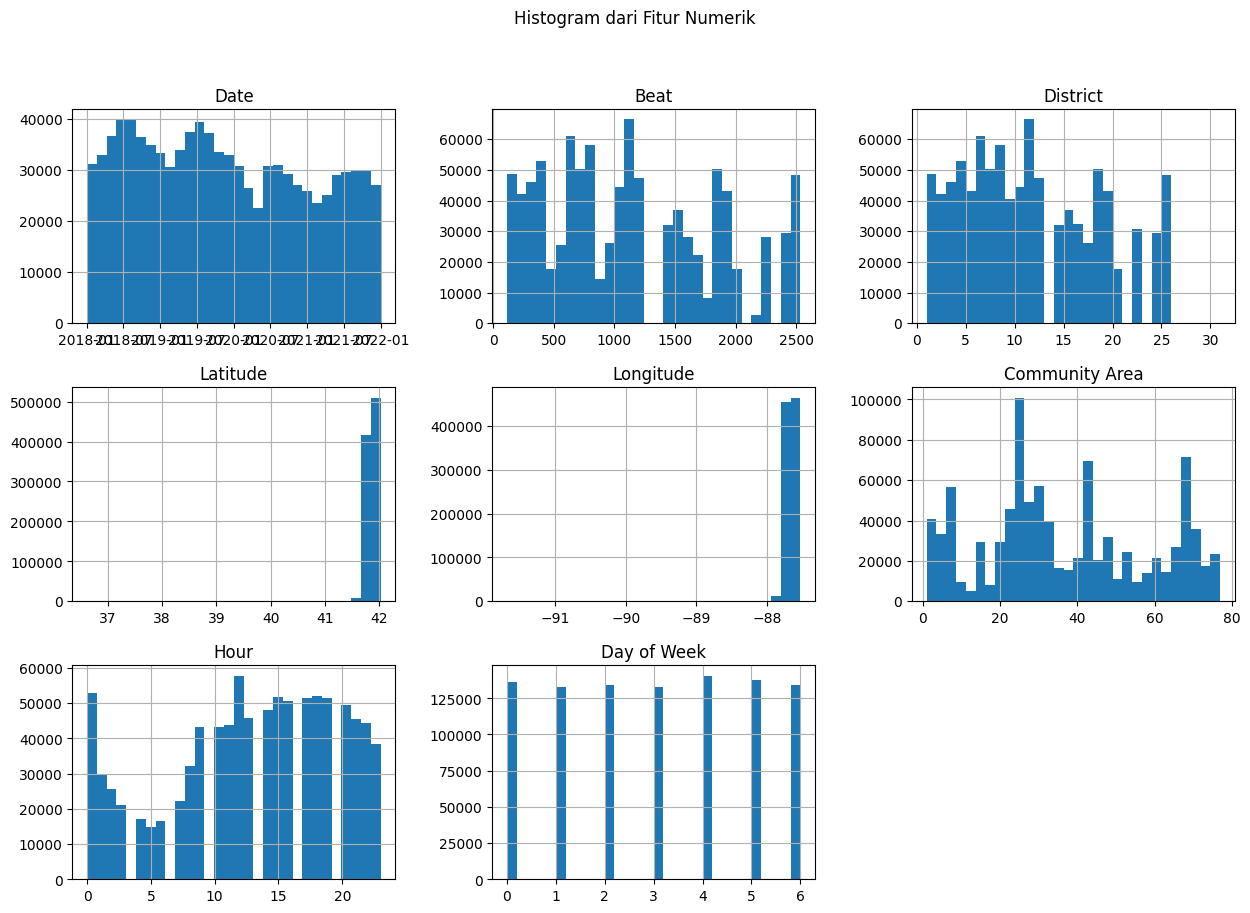

In [14]:
# Melihat distrbusi pada fitur numerik
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram dari Fitur Numerik')
plt.show()

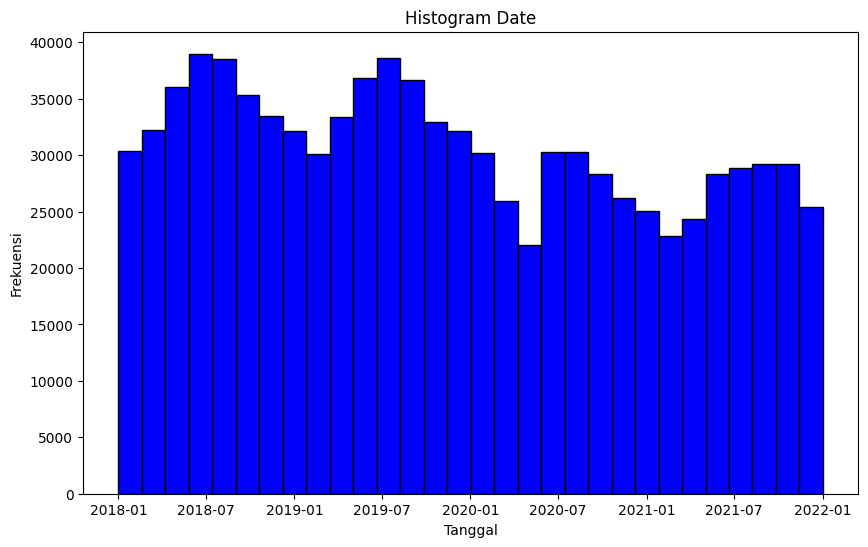

In [ ]:
# Mengatur ukuran
plt.figure(figsize=(10, 6))

# Mengonversi kolom Date ke format datetime jika belum
df['Date'] = pd.to_datetime(df['Date'])

# Membuat histogram untuk kolom Date
plt.hist(df['Date'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram Date')
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.show()


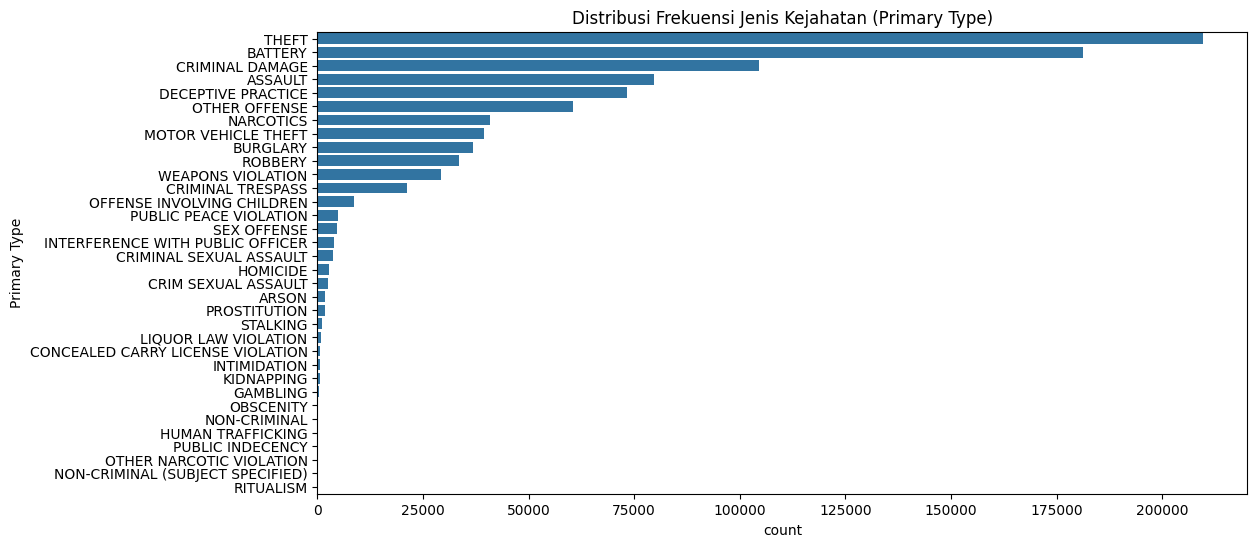

In [15]:
# Distrusi untuk data kategorikal `Primary Type`
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Primary Type'], order=df['Primary Type'].value_counts().index)
plt.title('Distribusi Frekuensi Jenis Kejahatan (Primary Type)')
plt.show()

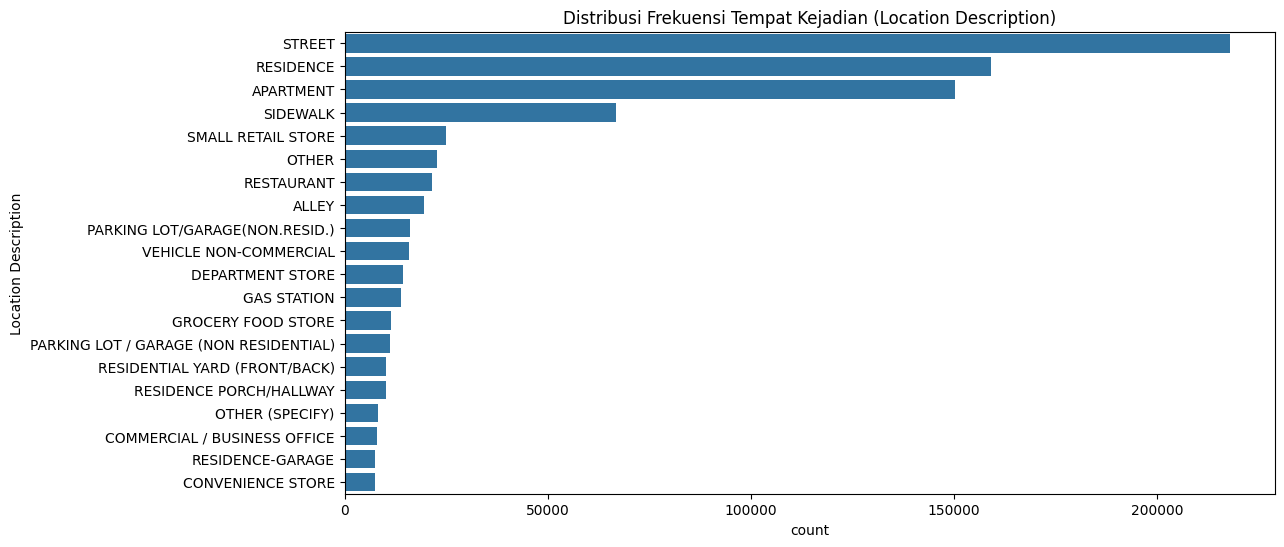

In [16]:
# Membatasi kategori yang akan ditampilkan (hanya 20 kategori teratas)
top_categories = df['Location Description'].value_counts().nlargest(20).index

# Membuat plot
plt.figure(figsize=(12, 6))
sns.countplot(y=df[df['Location Description'].isin(top_categories)]['Location Description'],
              order=top_categories)
plt.title('Distribusi Frekuensi Tempat Kejadian (Location Description)')
plt.show()


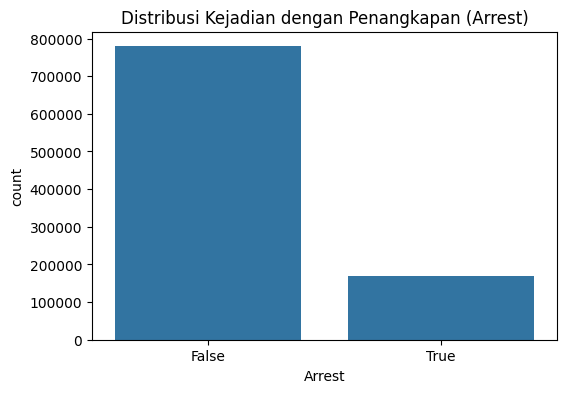

In [17]:
# Distribusi untuk data kategorikal biner (contoh: Arrest)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Arrest'])
plt.title('Distribusi Kejadian dengan Penangkapan (Arrest)')
plt.show()

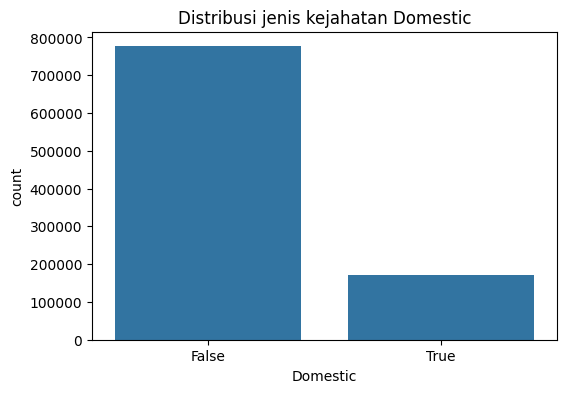

In [9]:
# Distribusi untuk data kategorikal biner (contoh: Arrest)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Domestic'])
plt.title('Distribusi jenis kejahatan Domestic')
plt.show()

### Multivariate

Analisis multivariate adalah teknik analisis data yang melibatkan beberapa variabel sekaligus untuk memahami hubungan atau interaksi antar variabel tersebut.

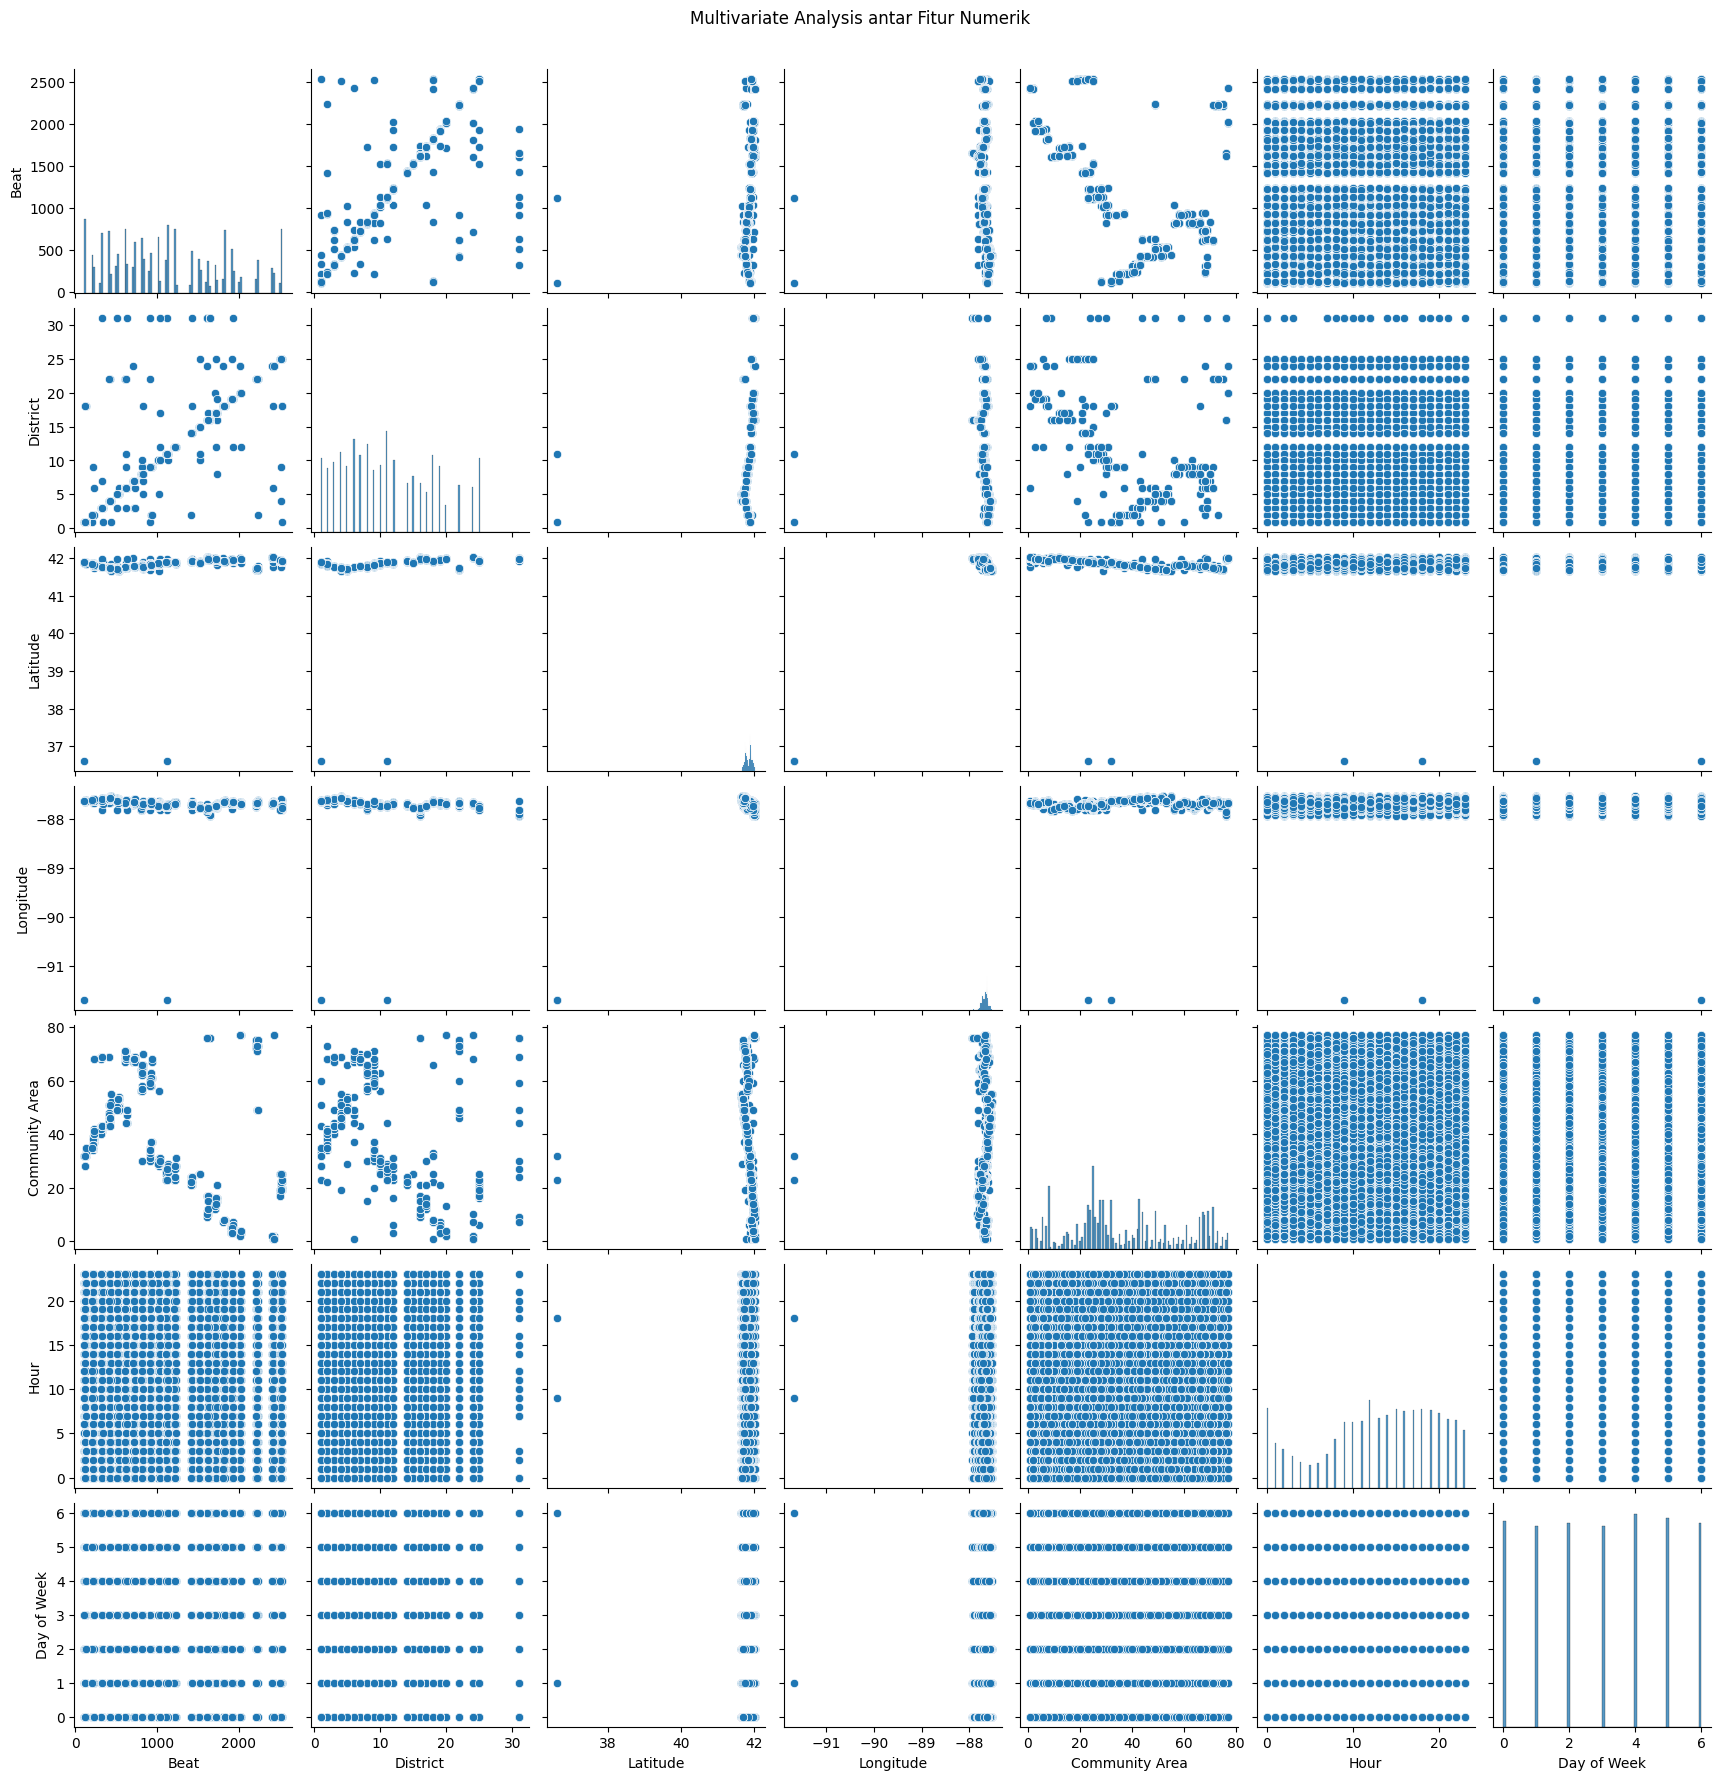

In [20]:
# Membuat plot untuk semua fitur numerik
numerical_features = ['Beat', 'District', 'Latitude', 'Longitude', 'Community Area', 'Hour', 'Day of Week']
sns.pairplot(df[numerical_features])
plt.suptitle('Multivariate Analysis antar Fitur Numerik', y=1.02)
plt.show()

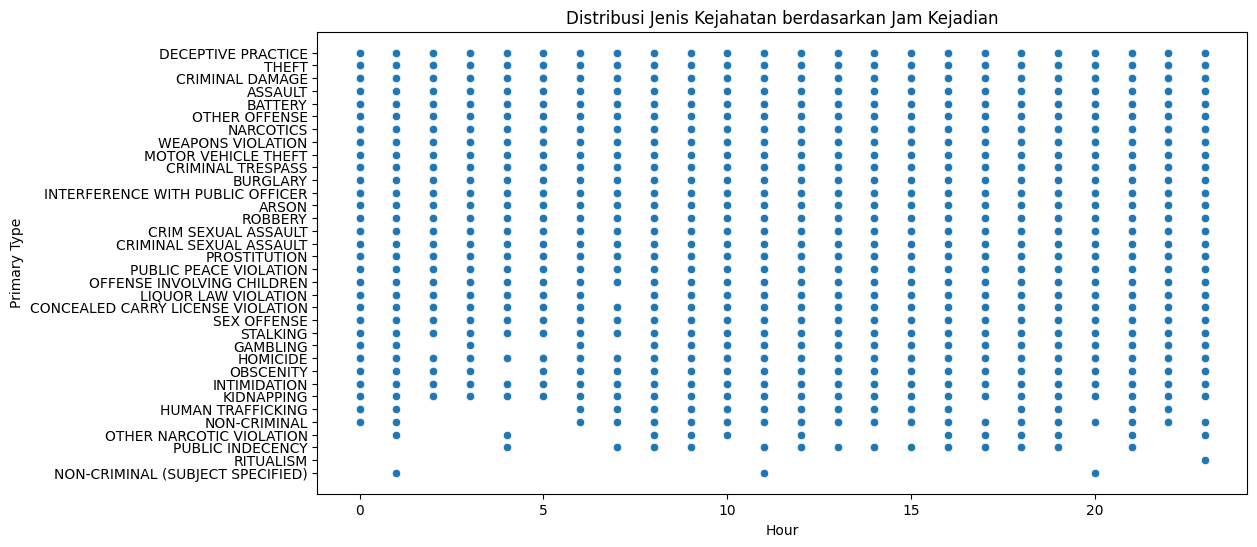

In [10]:
# Distribusi jenis kejahatan berdasarkan waktu (jam)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Hour', y='Primary Type', data=df)
plt.title('Distribusi Jenis Kejahatan berdasarkan Jam Kejadian')
plt.show()


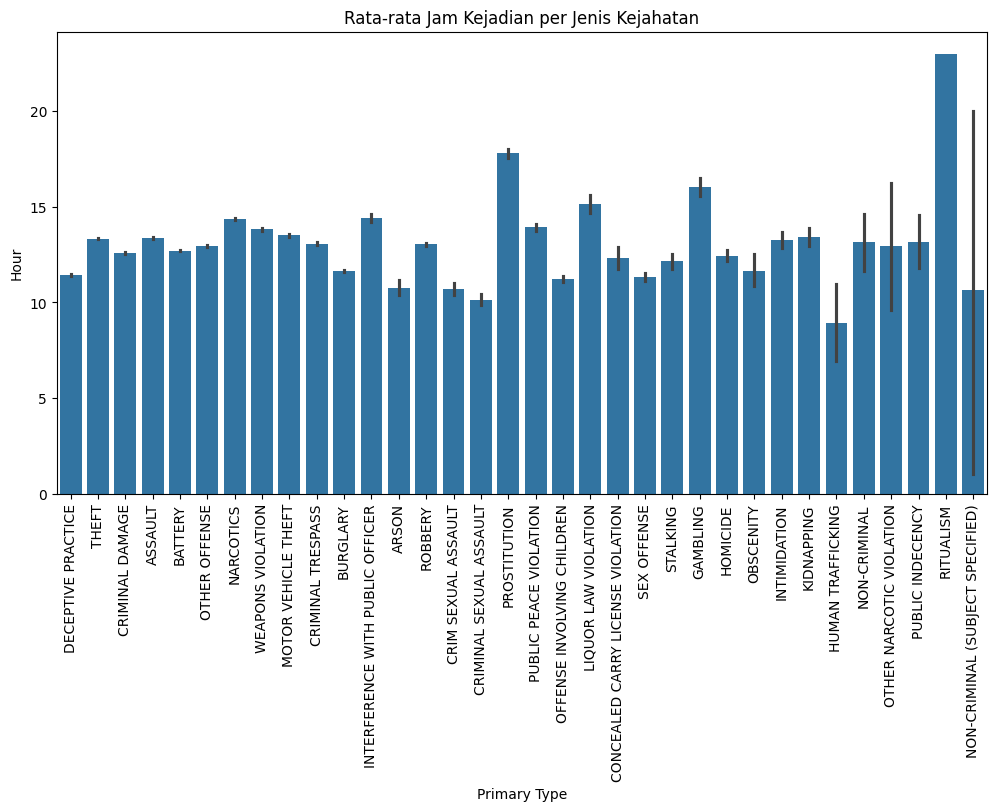

In [11]:
# Plot Rata-rata jam kejadian per jenis kejahatan
plt.figure(figsize=(12, 6))
sns.barplot(x='Primary Type', y='Hour', data=df)
plt.title('Rata-rata Jam Kejadian per Jenis Kejahatan')
plt.xticks(rotation=90)
plt.show()

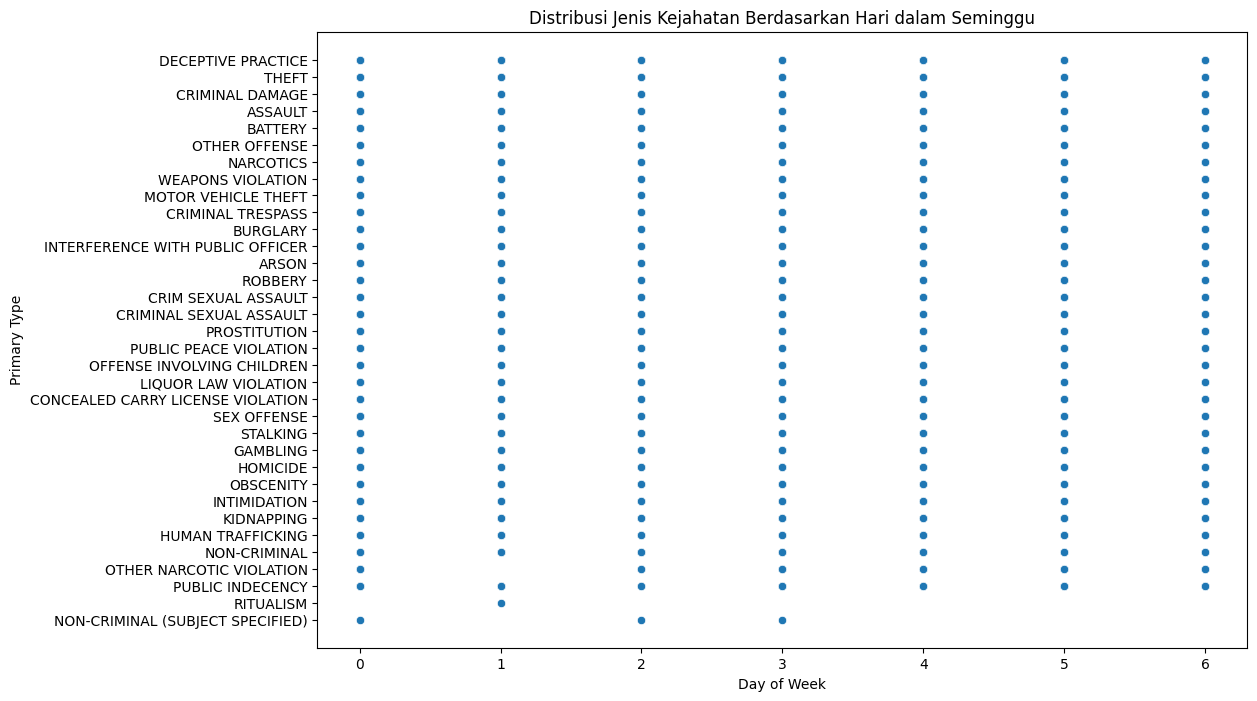

In [13]:
# Day of Week vs Primary Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Day of Week'], y=df['Primary Type'])
plt.title('Distribusi Jenis Kejahatan Berdasarkan Hari dalam Seminggu')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


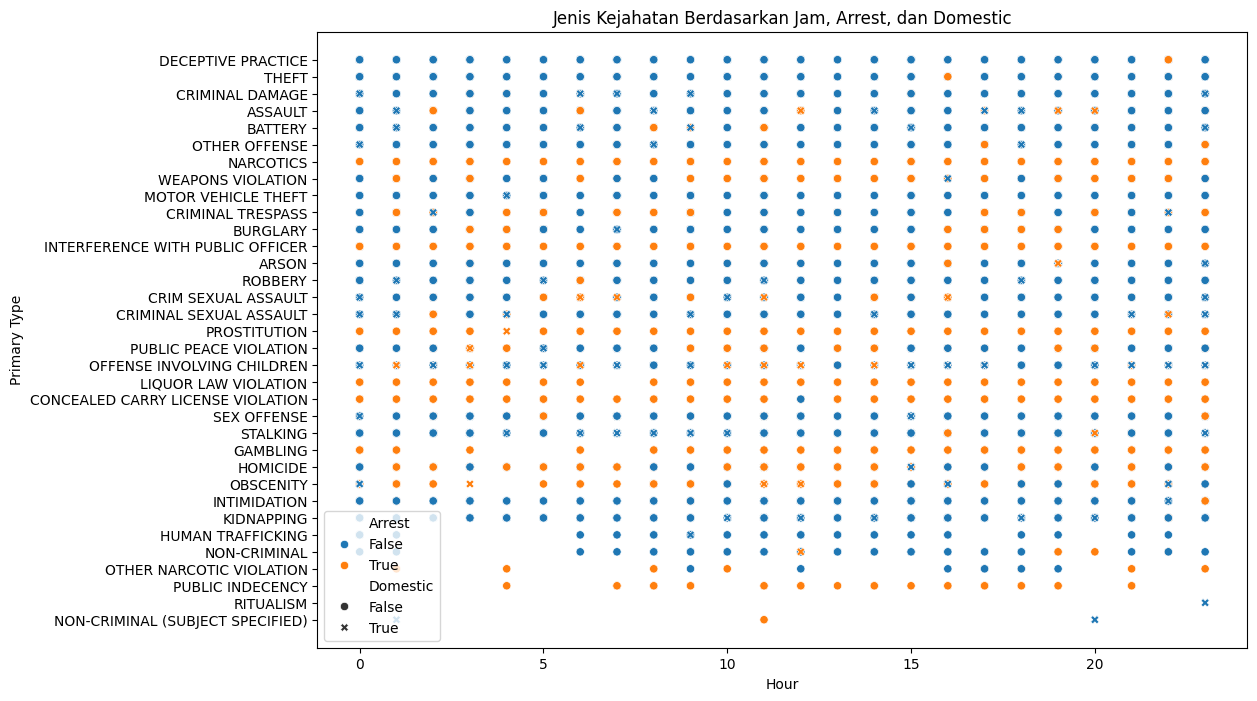

In [14]:
# Arrest, Domestic, Hour, and Primary Type
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Hour'], y=df['Primary Type'], hue=df['Arrest'], style=df['Domestic'])
plt.title('Jenis Kejahatan Berdasarkan Jam, Arrest, dan Domestic')
plt.show()

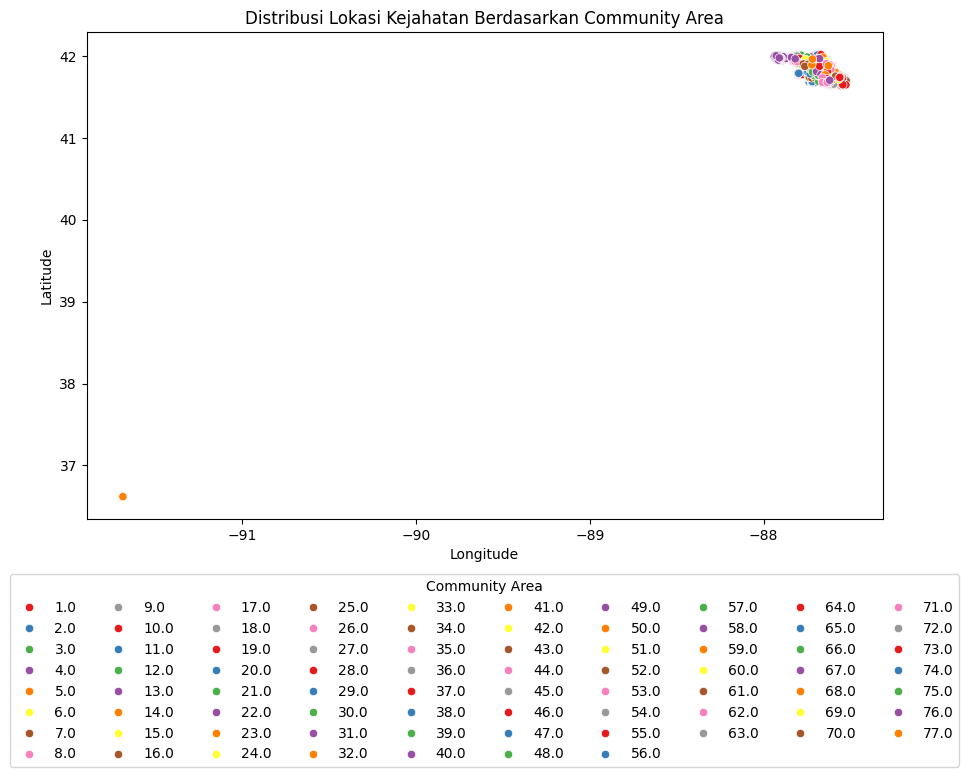

In [26]:
# Distribusi Lokasi Kejahatan Berdasarkan Community Area
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Community Area', palette='Set1')

# Memindahkan legend ke bawah plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=10, title="Community Area")
plt.title('Distribusi Lokasi Kejahatan Berdasarkan Community Area')
plt.tight_layout()
plt.show()

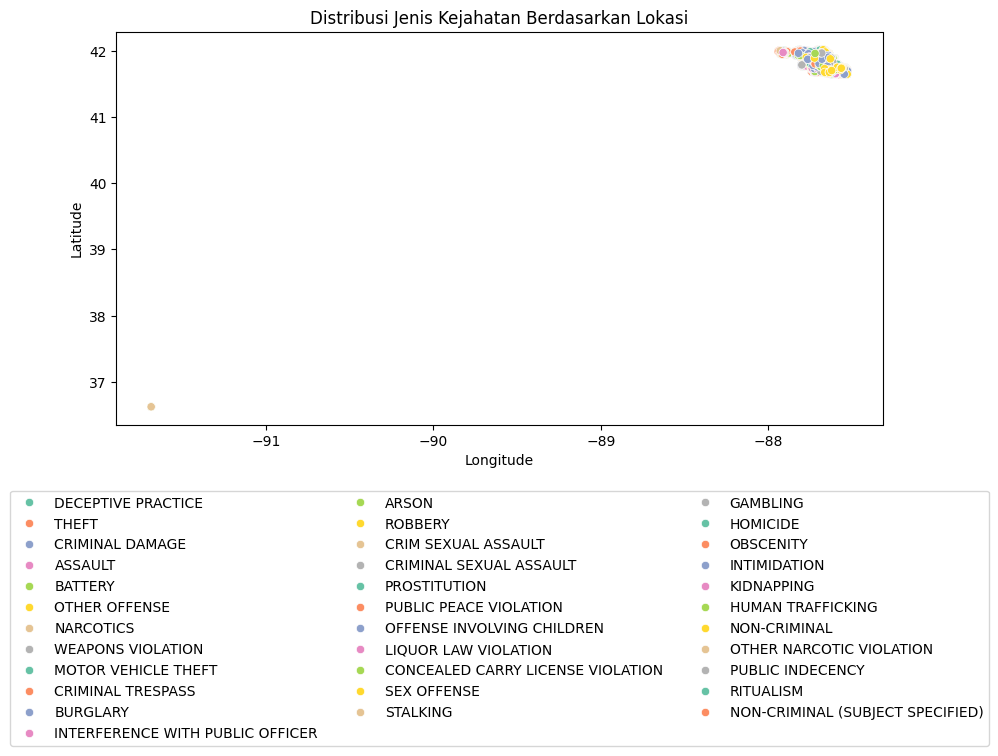

In [27]:
# Distribusi Jenis Kejahatan Berdasarkan Lokasi
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Primary Type', palette='Set2')
plt.title('Distribusi Jenis Kejahatan Berdasarkan Lokasi')

# Memindahkan legend ke bawah plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()

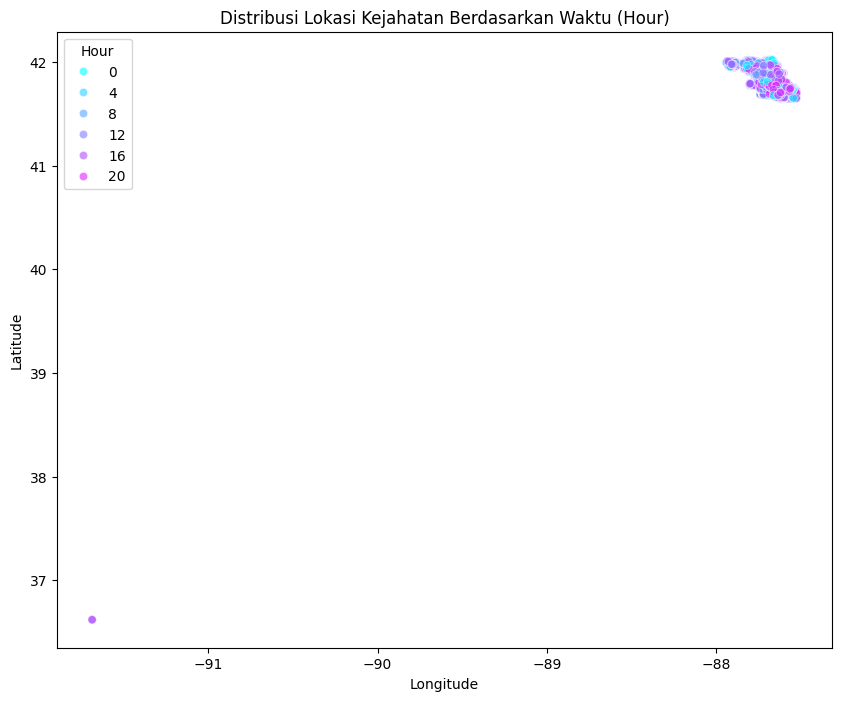

In [28]:
# Distribusi Lokasi Kejahatan Berdasarkan Waktu (Hour)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Hour', palette='cool', alpha=0.6)
plt.title('Distribusi Lokasi Kejahatan Berdasarkan Waktu (Hour)')
plt.show()

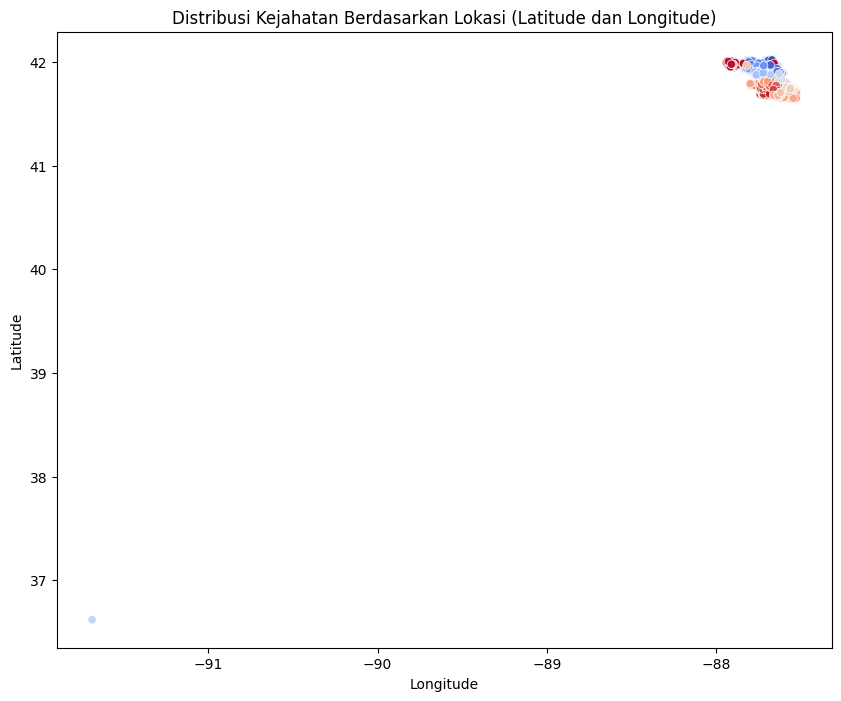

In [29]:
# Distribusi Kejahatan Berdasarkan Lokasi (Latitude dan Longitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['Community Area'], palette='coolwarm', legend=False)
plt.title('Distribusi Kejahatan Berdasarkan Lokasi (Latitude dan Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

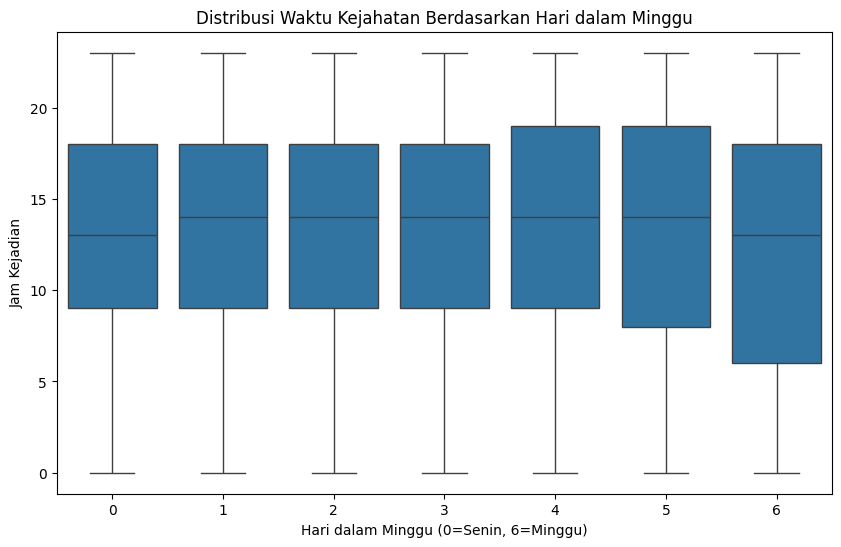

In [15]:
# Plot untuk Hour dan Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Hour', data=df)
plt.title('Distribusi Waktu Kejahatan Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu (0=Senin, 6=Minggu)')
plt.ylabel('Jam Kejadian')
plt.show()

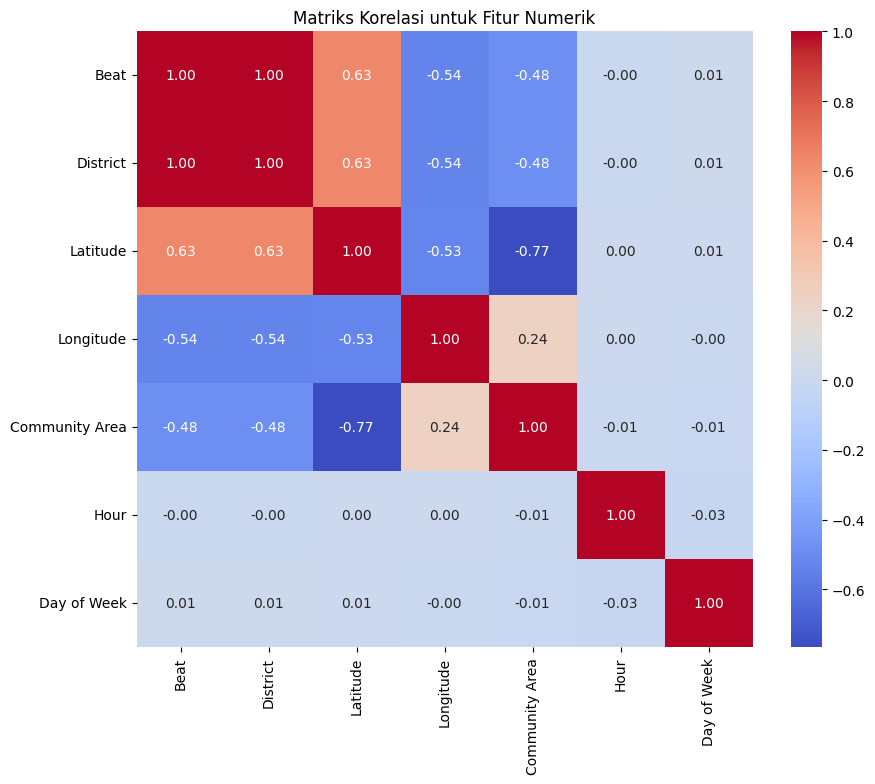

In [16]:
# Membuat DataFrame baru hanya dengan fitur numerik dari dataset
df_numeric = df[['Beat', 'District', 'Latitude', 'Longitude', 'Community Area', 'Hour', 'Day of Week']]

# Menghitung korelasi antar fitur numerik
correlation_matrix = df_numeric.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi untuk Fitur Numerik')
plt.show()

# Data Preperation

Pada Data Preperation ini dilakukan pembersihan data diantaranya, menghapus *missing values*, duplikasi, dan *outliers*. Setelah dibersihkan, data akan di *encoding* terlebih dahulu sebelum melewati proses pembagian data, kemudian data yang sudah dibagi akan di*scaling*. Data yang sudah di*scaling* akan dimasukkan kedalam model untuk dilatih dan diuji / prediksi.

## Menangani Missing Values

Melakukan penghapusan baris pada missing values, dengan harapan setiap baris pada data tidak terdapat missing values.

In [32]:
# Memeriksa missing values
print(df.isnull().sum())

Primary Type                0
Date                        0
Location Description     4319
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Latitude                14385
Longitude               14385
Community Area              1
Hour                        0
Day of Week                 0
dtype: int64


In [33]:
# Menghapus baris yang memiliki missing values
df = df.dropna()

# Menampilkan kolom yang terdapat missing values
print(df.isnull().sum())

Primary Type            0
Date                    0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Latitude                0
Longitude               0
Community Area          0
Hour                    0
Day of Week             0
dtype: int64


In [ ]:
# Melihat kembali informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930769 entries, 0 to 948400
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Primary Type          930769 non-null  object        
 1   Date                  930769 non-null  datetime64[ns]
 2   Location Description  930769 non-null  object        
 3   Arrest                930769 non-null  bool          
 4   Domestic              930769 non-null  bool          
 5   Beat                  930769 non-null  int64         
 6   District              930769 non-null  int64         
 7   Latitude              930769 non-null  float64       
 8   Longitude             930769 non-null  float64       
 9   Community Area        930769 non-null  float64       
 10  Hour                  930769 non-null  int32         
 11  Day of Week           930769 non-null  int32         
dtypes: bool(2), datetime64[ns](1), float64(3), int32(2), int64(2), 

Setelah penghapusan *missing values*, jumlah data menjadi `930769`.

## Menghapus Duplikasi

Proses ini akan dilakukan penghapusan data duplikat yang identik, dengan harapan setelah data duplikat dihapus, data yang ada itu bersifat *unique*.

In [34]:
# Menyimpan jumlah baris sebelum penghapusan duplikasi
before = df.shape[0]
print(f"Jumlah baris sebelum menghapus duplicates: {before}")

Jumlah baris sebelum menghapus duplicates: 930769


In [35]:
# Memeriksa jumlah total baris duplikat
total_duplicates = df.duplicated().sum()
print(f"Jumlah total baris duplikat: {total_duplicates}")

Jumlah total baris duplikat: 1647


In [36]:
# Menghapus baris yang terduplikasi secara identik
df = df.drop_duplicates()

# Menampilkan jumlah baris sebelum dan setelah menghapus duplikasi
after = df.shape[0]
print(f"Jumlah baris setelah menghapus duplicates: {after}")

Jumlah baris setelah menghapus duplicates: 929122


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929122 entries, 0 to 948417
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Primary Type          929122 non-null  object        
 1   Date                  929122 non-null  datetime64[ns]
 2   Location Description  929122 non-null  object        
 3   Arrest                929122 non-null  bool          
 4   Domestic              929122 non-null  bool          
 5   Beat                  929122 non-null  int64         
 6   District              929122 non-null  int64         
 7   Latitude              929122 non-null  float64       
 8   Longitude             929122 non-null  float64       
 9   Community Area        929122 non-null  float64       
 10  Hour                  929122 non-null  int32         
 11  Day of Week           929122 non-null  int32         
dtypes: bool(2), datetime64[ns](1), float64(3), int32(2), int64(2), 

Setelah penghapusan data duplikat, jumlah data menjadi `929122`.

## Menghapus Outliers

Penghapusan *outliers* dilakukan untuk meningkatkan kualitas data dengan menghilangkan nilai-nilai yang jauh berbeda dari distribusi umum data. *Outliers* sering kali mengganggu analisis atau pemodelan.



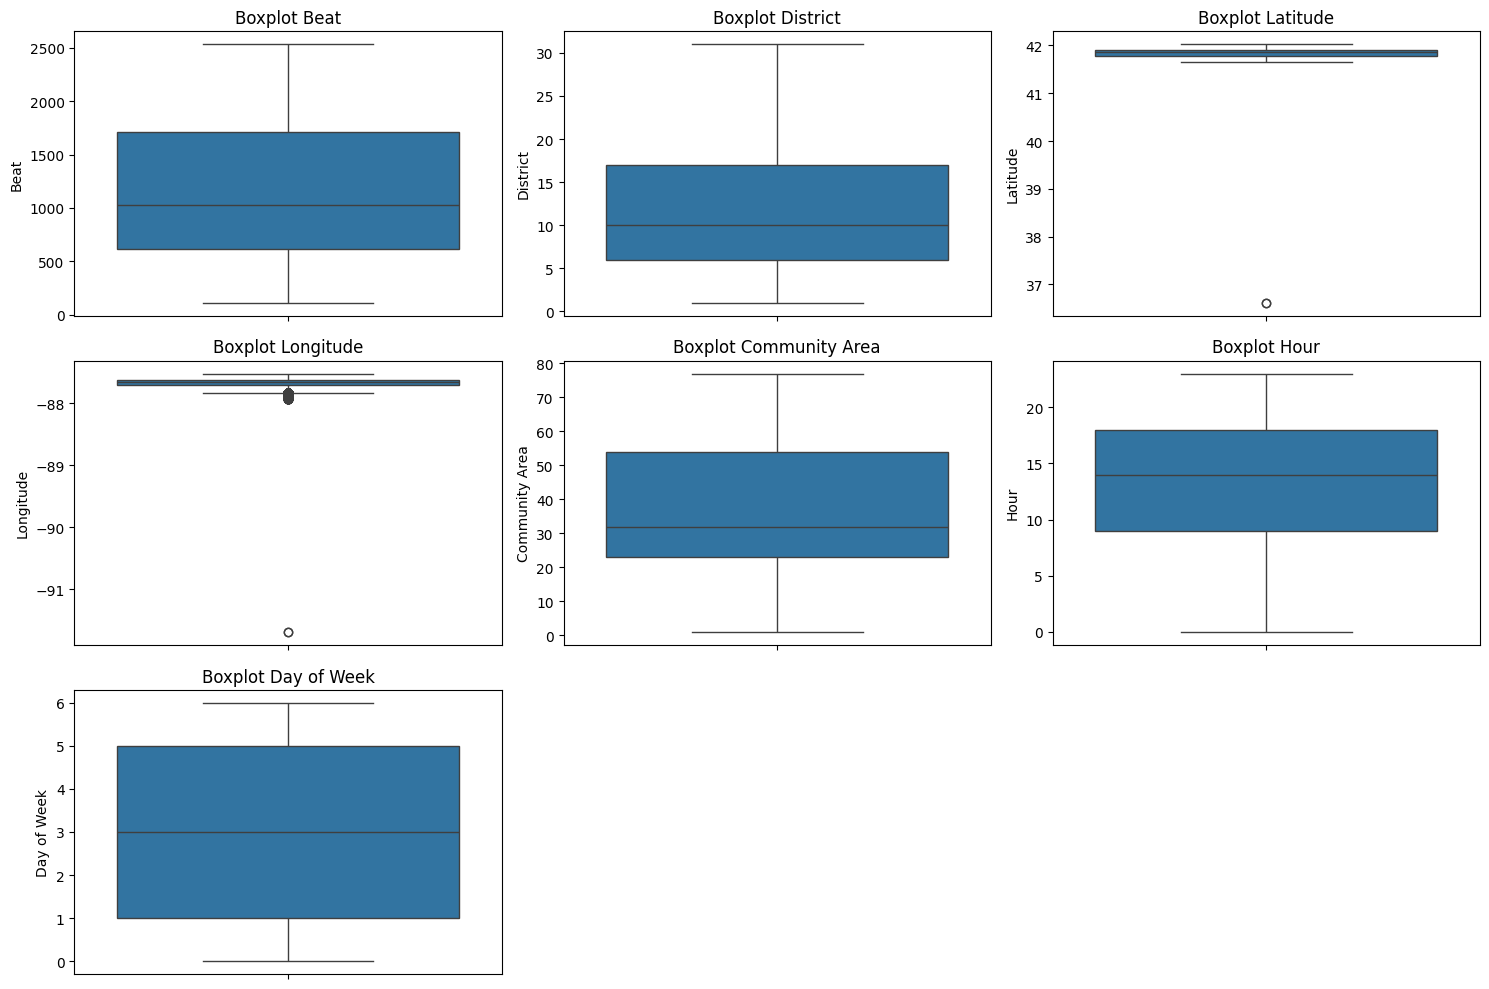

In [38]:
# Menentukan kolom numerik
numerical_columns = ['Beat', 'District', 'Latitude', 'Longitude', 'Community Area', 'Hour', 'Day of Week']

# Mengatur ukuran figure
plt.figure(figsize=(15, 10))

# Membuat box plot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Mengatur jumlah subplot dalam grid
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

# Mengatur layout agar plot tidak tumpang tindih
plt.tight_layout()
plt.show()

melihat lebih dekat pada 2 box longitude dan latitude

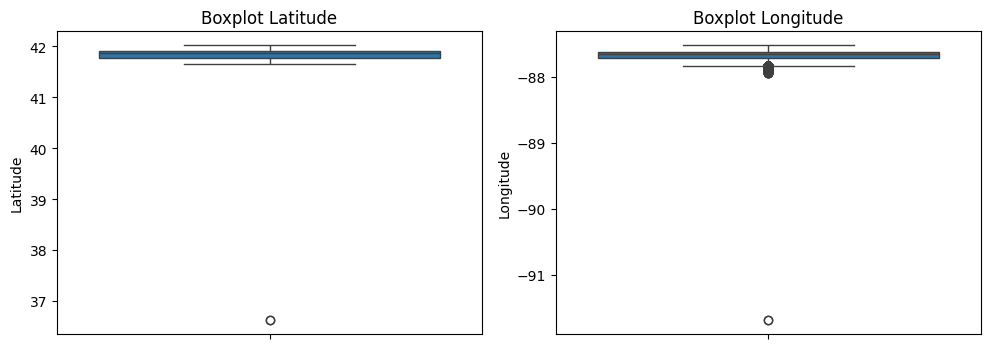

In [39]:
# Menentukan kolom numerik
numerical_columns = ['Latitude', 'Longitude']

# Mengatur ukuran figure
plt.figure(figsize=(15, 10))

# Membuat box plot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Mengatur jumlah subplot dalam grid
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

# Mengatur layout agar plot tidak tumpang tindih
plt.tight_layout()
plt.show()


melihat adanya outliers di kolom Longitude dan Latitude, maka dari itu akan dilakukan penghapusan outliers dengan metode IQR. Formula metode IQR dapat digambarkan sebagai berikut:<br>
   $IQR=Q_3-Q_1$
   
   Kemudian membuat batas bawah dan batas atas untuk mencakup *outliers* dengan menggunakan,
   
   $BatasBawah=Q_1-1.5*IQR$
   
   $BatasAtas=Q_3-1.5*IQR$

In [40]:
print(f"Jumlah baris sebelum penghapusan outliers: {df.shape[0]}")

# Menghitung Q1 dan Q3 untuk Longitude
Q1_longitude = df['Longitude'].quantile(0.25)
Q3_longitude = df['Longitude'].quantile(0.75)
IQR_longitude = Q3_longitude - Q1_longitude

# Tentukan batas atas dan bawah untuk outliers Longitude
lower_bound_longitude = Q1_longitude - 1.5 * IQR_longitude
upper_bound_longitude = Q3_longitude + 1.5 * IQR_longitude

# Filter DataFrame untuk menghapus outliers Longitude
df_outliers_longitude = df[(df['Longitude'] >= lower_bound_longitude) & (df['Longitude'] <= upper_bound_longitude)]

# Menghitung Q1 dan Q3 untuk Latitude
Q1_latitude = df['Latitude'].quantile(0.25)
Q3_latitude = df['Latitude'].quantile(0.75)
IQR_latitude = Q3_latitude - Q1_latitude

# Tentukan batas atas dan bawah untuk outliers Latitude
lower_bound_latitude = Q1_latitude - 1.5 * IQR_latitude
upper_bound_latitude = Q3_latitude + 1.5 * IQR_latitude

# Filter DataFrame untuk menghapus outliers Latitude
df_outliers_latitude = df[(df['Latitude'] >= lower_bound_latitude) & (df['Latitude'] <= upper_bound_latitude)]

# Gabungkan hasil penghapusan outliers dari Longitude dan Latitude
df = pd.merge(df_outliers_longitude, df_outliers_latitude, how='inner')

# Menampilkan jumlah baris setelah penghapusan outliers
print(f"\nJumlah baris setelah penghapusan outliers: {df.shape[0]}")

Jumlah baris sebelum penghapusan outliers: 929122

Jumlah baris setelah penghapusan outliers: 924193


Setelah dilakukan penghapusan *outliers*, dilakukan pengecekan kembali untuk melihat *outliers*, awalnya berjumlah `929122` baris kemudian setelah dihapus, jumlah baris menurun menjadi `924193` baris. Dan dilakukan visualisasi kembali guna mengecek apakah terdapat *outliers*

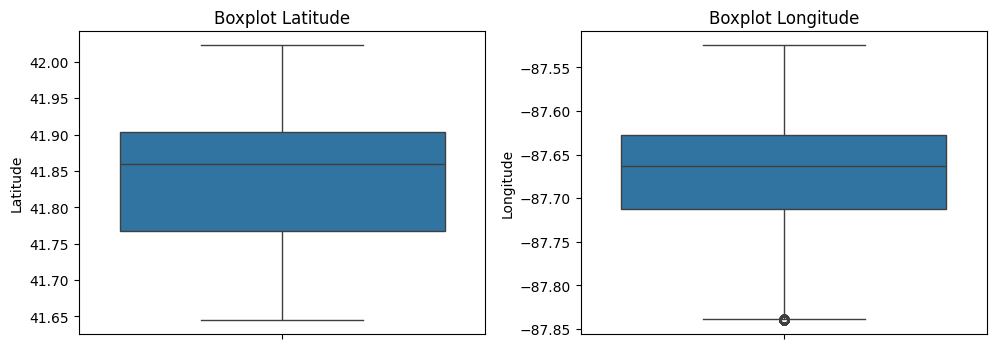

In [41]:
# Menentukan kolom numerik
numerical_columns = ['Latitude', 'Longitude']

# Mengatur ukuran figure
plt.figure(figsize=(15, 10))

# Membuat box plot untuk setiap kolom numerik
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Mengatur jumlah subplot dalam grid
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

# Mengatur layout agar plot tidak tumpang tindih
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan bahwa masih terdapat *outliers* pada fitur `Longitude` tetapi masih dalam batas aman.

## Drop Tabel

In [ ]:
#del df

In [ ]:
#import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/Dicoding/Machine Learning Terapan/P1/cleaned_crime_without_hour_n_day.csv')

In [ ]:
# URL langsung ke file
url = 'https://drive.google.com/uc?id=1nwg0xL-Ef8nbjWJoLKVDJg3i-tH6QvG5'

# Membaca CSV
df = pd.read_csv(url)

# Menghapus kolom 'Date'
df = df.drop(columns=['Date'])

df.head()

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area
0,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,False,132,1,41.852248,-87.623786,33.0
1,THEFT,GROCERY FOOD STORE,False,False,1221,12,41.895732,-87.687784,24.0
2,THEFT,RESIDENCE,False,False,1224,12,41.882002,-87.662287,28.0
3,CRIMINAL DAMAGE,STREET,False,False,1922,19,41.946987,-87.669164,6.0
4,ASSAULT,GAS STATION,False,False,2033,20,41.975838,-87.659854,3.0


In [42]:
df.head()

,Primary Type,Date,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area,Hour,Day of Week
0,DECEPTIVE PRACTICE,2019-09-24 08:00:00,COMMERCIAL / BUSINESS OFFICE,False,False,132,1,41.852248,-87.623786,33.0,8,1
1,THEFT,2019-10-13 20:30:00,GROCERY FOOD STORE,False,False,1221,12,41.895732,-87.687784,24.0,20,6
2,THEFT,2019-10-05 18:30:00,RESIDENCE,False,False,1224,12,41.882002,-87.662287,28.0,18,5
3,CRIMINAL DAMAGE,2019-10-13 19:00:00,STREET,False,False,1922,19,41.946987,-87.669164,6.0,19,6
4,ASSAULT,2019-10-13 14:10:00,GAS STATION,False,False,2033,20,41.975838,-87.659854,3.0,14,6


In [43]:
# Menghapus kolom 'Date', 'Hour', dan 'Day of Week' dari DataFrame
df = df.drop(columns=['Date', 'Hour', 'Day of Week'])

# Menampilkan 5 baris pertama untuk memastikan kolom telah dihapus
df.head()

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area
0,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,False,132,1,41.852248,-87.623786,33.0
1,THEFT,GROCERY FOOD STORE,False,False,1221,12,41.895732,-87.687784,24.0
2,THEFT,RESIDENCE,False,False,1224,12,41.882002,-87.662287,28.0
3,CRIMINAL DAMAGE,STREET,False,False,1922,19,41.946987,-87.669164,6.0
4,ASSAULT,GAS STATION,False,False,2033,20,41.975838,-87.659854,3.0


## Perubahan Fitur

In [44]:
# Menghitung distribusi untuk setiap kategori di Community Area
value_counts = df['Community Area'].value_counts()

# Membuat mapping berdasarkan kategori
category_map = {}
for community_area, count in value_counts.items():
    if count > 30000:
        category_map[community_area] = 'Sering Terjadi'
    elif count > 5000:
        category_map[community_area] = 'Jarang Terjadi'
    else:
        category_map[community_area] = 'Sangat Jarang Terjadi'

# Menggunakan mapping untuk mengelompokkan kategori
df['Community Area'] = df['Community Area'].map(category_map)

# Mengubah kategori menjadi numerik di kolom yang sama
group_mapping = {'Sering Terjadi': 0, 'Jarang Terjadi': 1, 'Sangat Jarang Terjadi': 2}
df['Community Area'] = df['Community Area'].map(group_mapping)

df.head()

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area
0,DECEPTIVE PRACTICE,COMMERCIAL / BUSINESS OFFICE,False,False,132,1,41.852248,-87.623786,1
1,THEFT,GROCERY FOOD STORE,False,False,1221,12,41.895732,-87.687784,1
2,THEFT,RESIDENCE,False,False,1224,12,41.882002,-87.662287,0
3,CRIMINAL DAMAGE,STREET,False,False,1922,19,41.946987,-87.669164,1
4,ASSAULT,GAS STATION,False,False,2033,20,41.975838,-87.659854,1


In [46]:
# Menghitung 3 kelas yang baru diapply
df['Community Area'].value_counts()

,count
Community Area,
1,633455
0,219869
2,70869


## Encoding

Pada proses ini akan dilakukan perubahan pada fitur kategori seperti `Primary Type`, dan `Location Description` diubah menjadi fitur numerik, fitur lain seperti `Arrest` dan `Domestic` dari kategori `boolean` berupa teks True / False akan diubah menjadi numerik (0 atau 1). Proses Encoding ini menggunakan LabelEncoder dari *library* SKLearn.

In [ ]:
# del df_encoded

In [ ]:
# Menginisialisasi LabelEncoder
le = LabelEncoder()

df_encoded = df

# Menggunakan LabelEncoder untuk fitur 'Primary Type dan Location Description'
df_encoded['Primary Type'] = le.fit_transform(df['Primary Type'])
df_encoded['Location Description'] = le.fit_transform(df['Location Description'])

# Mengubah kolom boolean menjadi 0 atau 1
df_encoded['Arrest'] = df_encoded['Arrest'].astype(int)
df_encoded['Domestic'] = df_encoded['Domestic'].astype(int)

# Melihat hasil encoding
df_encoded.head()

,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Community Area
0,9,53,0,0,132,1,41.852248,-87.623786,33.0
1,32,90,0,0,1221,12,41.895732,-87.687784,24.0
2,32,134,0,0,1224,12,41.882002,-87.662287,28.0
3,6,159,0,0,1922,19,41.946987,-87.669164,6.0
4,1,85,0,0,2033,20,41.975838,-87.659854,3.0


## Split Data

Sebelum data di bagi, dilakukan pemisahan fitur dan target dari dataset. Semua kolom kecuali `Community Area` dipilih sebagai fitur, sementara kolom `Community Area` dijadikan target yang ingin diprediksi atau klasifikasi. setelah pemisahan fitur dan target, dilakukan pembagian data pada dataset. Rasio pembagian data ini adalah 70:30, 70% untuk data latih, dan 30% untuk data uji. Pada tahapan ini akan memisahkan fitur dan target dalam dataset.

In [ ]:
# Memisahkan fitur dan target
X = df_encoded.drop(columns=['Community Area'])  # Semua kolom kecuali 'Community Area' sebagai fitur
y = df_encoded['Community Area']  # Kolom 'Community Area' sebagai target

# Membagi data menjadi 90% untuk training dan 10% untuk testing, tanpa stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data hasil split
print(f"Ukuran data training: {X_train.shape}, target training: {y_train.shape}")
print(f"Ukuran data testing: {X_test.shape}, target testing: {y_test.shape}")



Ukuran data training: (646935, 8), target training: (646935,)
Ukuran data testing: (277258, 8), target testing: (277258,)


## Scaling

Setelah data dibagi, langkah selanjutnya adalah melakukan proses scaling pada fitur-fitur dalam data yang telah dibagi. Scaling ini bertujuan untuk menyelaraskan rentang nilai setiap fitur, sehingga tidak ada fitur yang mendominasi atau mempengaruhi model secara berlebihan. Dengan menggunakan metode MinMax Scaling dari *library* SKLearn, setiap nilai fitur akan dipetakan dalam rentang 0 hingga 1. Scaling dilakukan pada data latih dan data uji.

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan scaling pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan scaling pada data uji
X_test_scaled = scaler.transform(X_test)

# Mengecek apakah nilai di antara 0 dan 1
print(f"Min data training: {X_train_scaled.min()}")
print(f"Max data training: {X_train_scaled.max()}")
print(f"Min data testing: {X_test_scaled.min()}")
print(f"Max data testing: {X_test_scaled.max()}")

Min data training: 0.0
Max data training: 1.0
Min data testing: 0.0
Max data testing: 1.0


# Modeling

Pada tahapan akan menjawab **Problem Statement** dalam membangun model. Setelah data dibagi dan di*scaling*, dilakukan pembangunan model, model yang dipilih ialah KNN (K-Nearest Neighbor) dan Naive Bayes untuk dibandingkan performanya, setiap model akan dilatih menggunakan data latih dan setelah model dibangun akan dilakukan pengujian dengan data uji untuk melihat performa kemampuan model dalam klasifikasi.

In [ ]:
# Inisialisasi model Naive Bayes dan KNN
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Melatih model Naive Bayes pada data latih
nb_model.fit(X_train_scaled, y_train)

# Melatih model KNN pada data latih
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

Setelah setiap model dilatih, dilakukan prediksi menggunakan data uji, dan nilai hasil prediksi akan disimpan untuk dievaluasi.

In [ ]:
# Prediksi dan akurasi untuk Naive Bayes
nb_train_pred = nb_model.predict(X_train_scaled)
nb_test_pred = nb_model.predict(X_test_scaled)
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
nb_test_accuracy = accuracy_score(y_test, nb_test_pred)

# Prediksi dan akurasi untuk KNN
knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)

# Menyimpan hasil akurasi dalam variabel untuk visualisasi nanti
train_accuracies = [nb_train_accuracy, knn_train_accuracy]
test_accuracies = [nb_test_accuracy, knn_test_accuracy]

# Evaluasi

Setelah model diprediksi menggunakan data uji, dilakukan evaluasi guna melihat performa model dalam mengklasifikasikan. Evaluasi ini menggunakan *Confusion Matrix* sebagai tolak ukur hasil dari prediksi.

In [ ]:
# Confusion matrix untuk data latih Naive Bayes
nb_train_cm = confusion_matrix(y_train, nb_train_pred)
nb_train_cm_df = pd.DataFrame(nb_train_cm, index=['Actual 0', 'Actual 1', 'Actual 2'],
                              columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])

# Confusion matrix untuk data uji Naive Bayes
nb_test_cm = confusion_matrix(y_test, nb_test_pred)
nb_test_cm_df = pd.DataFrame(nb_test_cm, index=['Actual 0', 'Actual 1', 'Actual 2'],
                             columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])

# Confusion matrix untuk data latih KNN
knn_train_cm = confusion_matrix(y_train, knn_train_pred)
knn_train_cm_df = pd.DataFrame(knn_train_cm, index=['Actual 0', 'Actual 1', 'Actual 2'],
                               columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])

# Confusion matrix untuk data uji KNN
knn_test_cm = confusion_matrix(y_test, knn_test_pred)
knn_test_cm_df = pd.DataFrame(knn_test_cm, index=['Actual 0', 'Actual 1', 'Actual 2'],
                              columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])

# Menampilkan confusion matrix dalam bentuk DataFrame
print("Confusion Matrix Naive Bayes - Data Latih:\n", nb_train_cm_df)
print("\nConfusion Matrix Naive Bayes - Data Uji:\n", nb_test_cm_df)
print("\nConfusion Matrix KNN - Data Latih:\n", knn_train_cm_df)
print("\nConfusion Matrix KNN - Data Uji:\n", knn_test_cm_df)


Confusion Matrix Naive Bayes - Data Latih:
           Predicted 0  Predicted 1  Predicted 2
Actual 0        25319       128344            0
Actual 1         9225       433633          903
Actual 2         1042        43804         4665

Confusion Matrix Naive Bayes - Data Uji:
           Predicted 0  Predicted 1  Predicted 2
Actual 0        11000        55206            0
Actual 1         3933       185401          360
Actual 2          481        18881         1996

Confusion Matrix KNN - Data Latih:
           Predicted 0  Predicted 1  Predicted 2
Actual 0       151481         2084           98
Actual 1         2461       440008         1292
Actual 2          163         2621        46727

Confusion Matrix KNN - Data Uji:
           Predicted 0  Predicted 1  Predicted 2
Actual 0        64630         1484           92
Actual 1         1774       186885         1035
Actual 2          121         1771        19466


Setelah nilai dari *Confusion Matrix* didapat, dilakukan perhitungan metrik akurasi sebagai acuan performa model dalam klasifikasi.

In [ ]:
# Membuat DataFrame dengan akurasi model
model_accuracies = {
    'Model': ['Naive Bayes', 'KNN'],
    'Data Latih': [nb_train_accuracy, nb_test_accuracy],
    'Data Uji': [knn_train_accuracy, knn_test_accuracy]
}

# Membuat DataFrame
accuracy_df = pd.DataFrame(model_accuracies)

# Menampilkan DataFrame
print(accuracy_df)

         Model  Data Latih  Data Uji
0  Naive Bayes    0.716636  0.986523
1          KNN    0.715568  0.977360


Melihat nilai akurasi dalam bentuk visualisasi

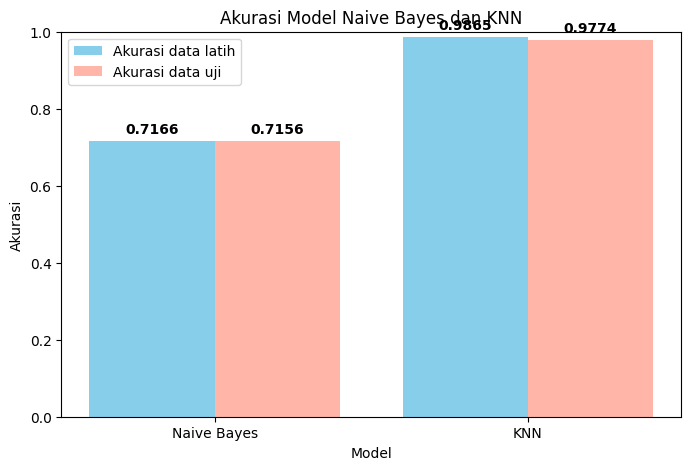

In [ ]:
# Nama model untuk visualisasi
models = ['Naive Bayes', 'KNN']
x = range(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, train_accuracies, width=0.4, label='Akurasi data latih', color='#87CEEB', align='center')
plt.bar([p + 0.4 for p in x], test_accuracies, width=0.4, label='Akurasi data uji', color='#FFB6A9', align='center')
plt.xlabel('Model', fontsize=10)
plt.ylabel('Akurasi', fontsize=10)
plt.title('Akurasi Model Naive Bayes dan KNN', fontsize=12)
plt.xticks([p + 0.2 for p in x], models, fontsize=10)
plt.ylim(0, 1)
plt.legend(fontsize=10)

# Menampilkan nilai akurasi pada setiap bar
for i, v in enumerate(train_accuracies):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
for i, v in enumerate(test_accuracies):
    plt.text(i + 0.4, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')

# Menampilkan Grafik
plt.show()

Dari hasil perhitungan akurasi model, terlihat bahwa model Naive Bayes dan KNN menunjukkan performa yang berbeda pada data latih dan data uji. Model Naive Bayes memiliki akurasi sebesar 0.7166 pada data latih dan 0.9865 pada data uji. Sementara itu, model KNN menunjukkan akurasi 0.7156 pada data latih dan 0.9774 pada data uji.

Hasil ini dapat menjawab **Problem Statement** yang mana model Naive Bayes dan KNN sama-sama menunjukkan akurasi tinggi pada data uji, yang mengindikasikan bahwa keduanya berhasil menangkap pola-pola penting dalam data, meskipun terdapat sedikit perbedaan pada akurasi data latih. Akurasi yang tinggi pada data uji ini menunjukkan bahwa model mampu membedakan area dengan kategori yang berbeda misalnya, area dengan kategori "Jarang Terjadi," "Sering Terjadi," dan "Sangat Jarang Terjadi" dengan baik, berdasarkan pola kejadian di area tersebut.

Dengan hasil ini dapat menyimpulkan bahwa baik Naive Bayes maupun KNN adalah model yang cocok untuk membantu prediksi area dengan tingkat kejadian tertentu dalam area yang diklasifikasikan.